In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.3
    Uninstalling Flask-2.3.3:
      Successfully uninstalled Flask-2.3.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

pd.set_option('display.max_columns', None)

/tmp/ipykernel_20/503535536.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_20/503535536.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
df = pd.read_csv('/kaggle/input/gender-inequality-index-dataset/Gender Inequality Index.csv')
df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,136.0,0.725,0.723,0.721,0.719,0.717,0.714,0.712,0.708,0.683,0.678,0.671,0.665,0.657,0.649,0.643,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330,0.319,0.282,0.297,0.305,0.301,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,11.0,0.659,0.647,0.640,0.632,0.635,0.627,0.624,0.616,0.609,0.605,0.605,0.602,0.599,0.597,0.592,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [4]:
gdi_columns = [column for column in df.columns if "Gender Inequality Index" in column]
gdi_columns

['Gender Inequality Index (1990)',
 'Gender Inequality Index (1991)',
 'Gender Inequality Index (1992)',
 'Gender Inequality Index (1993)',
 'Gender Inequality Index (1994)',
 'Gender Inequality Index (1995)',
 'Gender Inequality Index (1996)',
 'Gender Inequality Index (1997)',
 'Gender Inequality Index (1998)',
 'Gender Inequality Index (1999)',
 'Gender Inequality Index (2000)',
 'Gender Inequality Index (2001)',
 'Gender Inequality Index (2002)',
 'Gender Inequality Index (2003)',
 'Gender Inequality Index (2004)',
 'Gender Inequality Index (2005)',
 'Gender Inequality Index (2006)',
 'Gender Inequality Index (2007)',
 'Gender Inequality Index (2008)',
 'Gender Inequality Index (2009)',
 'Gender Inequality Index (2010)',
 'Gender Inequality Index (2011)',
 'Gender Inequality Index (2012)',
 'Gender Inequality Index (2013)',
 'Gender Inequality Index (2014)',
 'Gender Inequality Index (2015)',
 'Gender Inequality Index (2016)',
 'Gender Inequality Index (2017)',
 'Gender Inequality 

In [5]:
df
df[gdi_columns] = df[gdi_columns].apply(lambda row: row.fillna(0.0), axis=1)
df[gdi_columns] = df[gdi_columns].apply(lambda row: row.replace(0, row.mean()), axis=1)
df['GII Rank (2021)'] = df['Gender Inequality Index (2021)'].rank(ascending=False, method='min').astype(int)
df['UNDP Developing Regions'].fillna('None/NotSpecified', inplace=True)
df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,Europe,Northern Hemisphere,Very High,None/NotSpecified,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [6]:
gii_rank_by_continent = df.groupby('Continent')['Gender Inequality Index (2021)'].sum().reset_index()

fig = px.bar(gii_rank_by_continent, x='Continent', y='Gender Inequality Index (2021)', title='Gender Inequality Index (2021) by Country')
fig.show()

In [7]:
gii_rank_by_hemisphere = df.groupby('Hemisphere')['Gender Inequality Index (2021)'].sum().reset_index()

fig = px.bar(gii_rank_by_hemisphere, x='Hemisphere', y='Gender Inequality Index (2021)', title='Gender Inequality Index (2021) by Hemisphere')
fig.show()

In [8]:
gii_rank_by_dr = df.groupby('UNDP Developing Regions')['Gender Inequality Index (2021)'].sum().reset_index()

fig = px.bar(gii_rank_by_dr, x='UNDP Developing Regions', y='Gender Inequality Index (2021)', title='Gender Inequality Index (2021) by Hemisphere')
fig.show()

In [9]:
gii_rank_by_hdg = df.groupby('Human Development Groups')['Gender Inequality Index (2021)'].sum().reset_index()

fig = px.bar(gii_rank_by_hdg, x='Human Development Groups', y='Gender Inequality Index (2021)', title='Gender Inequality Index (2021) by Human Development Groups')
fig.show()

In [10]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Gender Inequality Index (1990-2021)"),
    
    # Dropdown for country selection
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country']],
        value=df['Country'][0],
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='gii-histogram')
])

@app.callback(
    Output('gii-histogram', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_histogram(selected_country):
    if selected_country:
        country_data = df[df['Country'] == selected_country].iloc[:, 8:-1].T.squeeze()
        return px.bar(country_data, x=country_data.index, y=country_data.values, title=f'Gender Inequality Index for {selected_country}').update_layout(width=1000, height=800)
    return {}

if __name__ == '__main__':
    app.run_server(debug=True)

In [11]:
analysis_df = df.copy()
analysis_df

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.74800,0.74900,0.75200,0.75500,0.75500,0.75300,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.63600,0.62800,0.62100,0.56800,0.56000,0.55100,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.30600,0.28500,0.28600,0.29300,0.24200,0.24600,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,Europe,Northern Hemisphere,Very High,None/NotSpecified,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.58400,0.31100,0.20200,0.19300,0.18500,0.17500,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,Southern Hemisphere,High,EAP,111.0,71,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.149250,0.14925,0.14925,0.14925,0.14925,0.14925,0.14925,0.479,0.482,0.475,0.447,0.443,0.409,0.407,0.407,0.405,0.404,0.418
191,YEM,Yemen,Asia,Northern Hemisphere,Low,AS,183.0,1,0.603094,0.603094,0.603094,0.603094,0.603094,0.603094,0.603094,0.603094,0.812000,0.807000,0.805000,0.803000,0.802000,0.822000,0.821000,0.79900,0.80000,0.79900,0.79800,0.79800,0.79800,0.799,0.800,0.802,0.806,0.815,0.810,0.808,0.806,0.785,0.784,0.820
192,ZAF,South Africa,Africa,Southern Hemisphere,High,SSA,109.0,74,0.511000,0.502000,0.496000,0.489000,0.482000,0.476000,0.472000,0.468000,0.461000,0.459000,0.459000,0.461000,0.459000,0.463000,0.459000,0.45400,0.45600,0.45200,0.46300,0.44300,0.44000,0.441,0.432,0.431,0.433,0.427,0.418,0.407,0.405,0.410,0.408,0.405
193,ZMB,Zambia,Africa,Southern Hemisphere,Medium,SSA,154.0,32,0.666000,0.660000,0.654000,0.651000,0.647000,0.642000,0.645000,0.646000,0.646000,0.648000,0.648000,0.642000,0.629000,0.626000,0.623000,0.61700,0.60600,0.60000,0.5940

In [12]:
analysis_df['Continent'].replace(['Africa', 'Asia', 'Europe', 'America', 'Oceania'], [1, 2, 3, 4, 5], inplace=True)
analysis_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,2,Northern Hemisphere,Low,SA,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,1,Southern Hemisphere,Medium,SSA,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,3,Northern Hemisphere,High,ECA,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,3,Northern Hemisphere,Very High,None/NotSpecified,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,2,Northern Hemisphere,Very High,AS,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [13]:
analysis_df['Gender Inequality Index (2021)'].sort_values(ascending=False)

191    0.820
140    0.725
127    0.680
0      0.678
28     0.672
       ...  
45     0.000
154    0.000
157    0.000
158    0.000
132    0.000
Name: Gender Inequality Index (2021), Length: 195, dtype: float64

In [14]:
analysis_df['UNDP Developing Regions'] = analysis_df['UNDP Developing Regions'].replace(['SSA', 'LAC', 'EAP', 'AS', 'ECA', 'SA', 'None/NotSpecified'], [1, 2, 3, 4, 5, 6, 0])
analysis_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,2,Northern Hemisphere,Low,6,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,1,Southern Hemisphere,Medium,1,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,3,Northern Hemisphere,High,5,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,3,Northern Hemisphere,Very High,0,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,2,Northern Hemisphere,Very High,4,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [15]:
analysis_df['Hemisphere'].replace(['Northern Hemisphere', 'Southern Hemisphere'], [0, 1], inplace=True)
analysis_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,2,0,Low,6,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,1,1,Medium,1,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,3,0,High,5,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,3,0,Very High,0,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,2,0,Very High,4,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [16]:
analysis_df['Human Development Groups'].value_counts()

Human Development Groups
Very High    66
High         49
Medium       44
Low          32
Name: count, dtype: int64

In [17]:
analysis_df['Human Development Groups'].replace(['Very High', 'High', 'Medium', 'Low'], [3, 2, 1, 0], inplace=True)
analysis_df.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (1990),Gender Inequality Index (1991),Gender Inequality Index (1992),Gender Inequality Index (1993),Gender Inequality Index (1994),Gender Inequality Index (1995),Gender Inequality Index (1996),Gender Inequality Index (1997),Gender Inequality Index (1998),Gender Inequality Index (1999),Gender Inequality Index (2000),Gender Inequality Index (2001),Gender Inequality Index (2002),Gender Inequality Index (2003),Gender Inequality Index (2004),Gender Inequality Index (2005),Gender Inequality Index (2006),Gender Inequality Index (2007),Gender Inequality Index (2008),Gender Inequality Index (2009),Gender Inequality Index (2010),Gender Inequality Index (2011),Gender Inequality Index (2012),Gender Inequality Index (2013),Gender Inequality Index (2014),Gender Inequality Index (2015),Gender Inequality Index (2016),Gender Inequality Index (2017),Gender Inequality Index (2018),Gender Inequality Index (2019),Gender Inequality Index (2020),Gender Inequality Index (2021)
0,AFG,Afghanistan,2,0,0.0,6,180.0,4,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.381437,0.748,0.749,0.752,0.755,0.755,0.753,0.746,0.738,0.728,0.718,0.706,0.692,0.678,0.671,0.665,0.674,0.678
1,AGO,Angola,1,1,1.0,1,148.0,34,0.725000,0.723000,0.721000,0.719000,0.717000,0.714000,0.712000,0.708000,0.683000,0.678000,0.671000,0.665000,0.657000,0.649000,0.643000,0.636,0.628,0.621,0.568,0.560,0.551,0.544,0.545,0.540,0.531,0.530,0.529,0.538,0.537,0.537,0.537,0.537
2,ALB,Albania,3,0,2.0,5,67.0,132,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.175250,0.330000,0.319000,0.282000,0.297000,0.305000,0.301000,0.306,0.285,0.286,0.293,0.242,0.246,0.252,0.235,0.225,0.219,0.204,0.191,0.170,0.164,0.156,0.156,0.144
3,AND,Andorra,3,0,3.0,0,40.0,171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,ARE,United Arab Emirates,2,0,3.0,4,26.0,160,0.659000,0.647000,0.640000,0.632000,0.635000,0.627000,0.624000,0.616000,0.609000,0.605000,0.605000,0.602000,0.599000,0.597000,0.592000,0.584,0.311,0.202,0.193,0.185,0.175,0.181,0.171,0.161,0.151,0.126,0.118,0.112,0.103,0.056,0.050,0.049


In [18]:
analysis_df.drop(columns=['ISO3', 'Country'], inplace=True)
gdi_columns.pop()
analysis_df.drop(columns=gdi_columns, inplace=True)
analysis_df.head()

,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),GII Rank (2021),Gender Inequality Index (2021)
0,2,0,0.0,6,180.0,4,0.678
1,1,1,1.0,1,148.0,34,0.537
2,3,0,2.0,5,67.0,132,0.144
3,3,0,3.0,0,40.0,171,0.000
4,2,0,3.0,4,26.0,160,0.049


<Axes: >

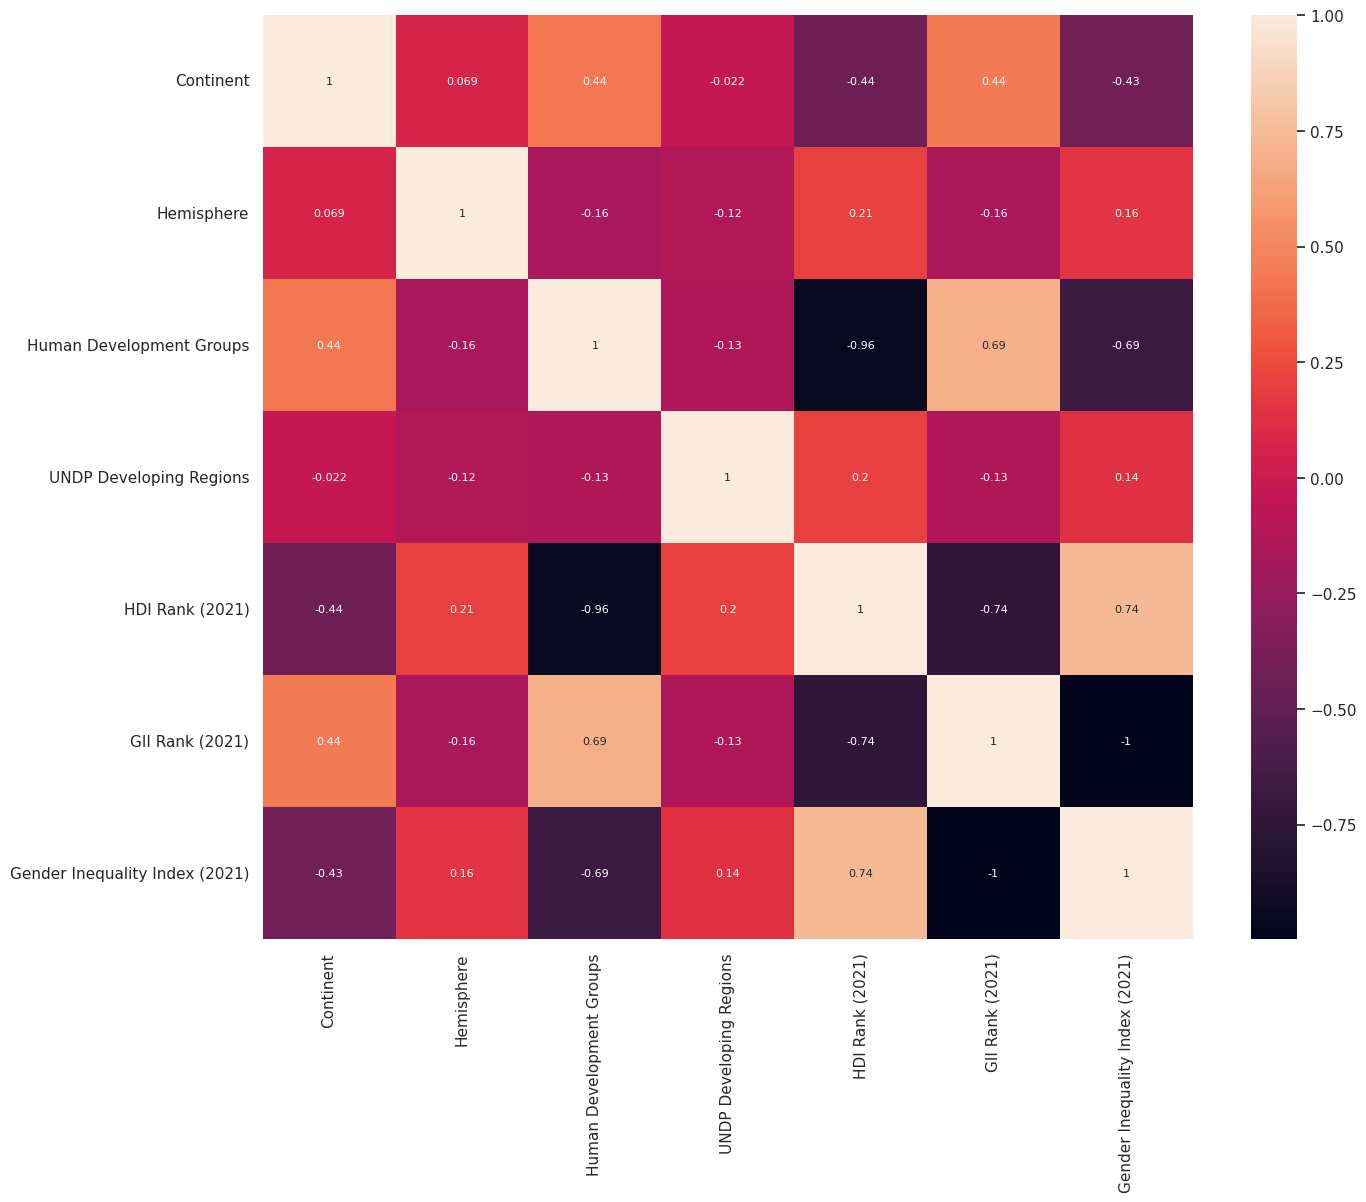

In [19]:
corr = analysis_df.corr()
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corr, annot=True, annot_kws={"size": 8})